# What to do?
* Predict if a text is easier to read or not.
* The more negative a score the more un-readable it is.
* At first instance this looks like a tabular data.
* perhaps this is also regression as we have continuous values in targets

look into the data

In [1]:
from typing import List, TypeVar
from pandas.core.frame import DataFrame
from fastai.basics import *
from fastai.callback.all import *
from fastai.text.all import *

custom typings

In [2]:
path = Path('../input/commonlitreadabilityprize/')

In [3]:
df_train = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
df_train.head(4)

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""We...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\n...",-1.054013,0.450007


dropping all columns except excerpts

In [4]:
def drop_cols(df: DataFrame, cols: List) -> DataFrame:
    return df.drop(cols, axis=1)

In [5]:
df_train_excerpts = df_train.copy()
df_train_excerpts = drop_cols(df_train_excerpts, ['id', 'url_legal', 'license', 'target', 'standard_error'])
df_train_excerpts.head(2)

,excerpt
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe..."
1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically..."


In [6]:
df_test = pd.read_csv('../input/commonlitreadabilityprize/test.csv')
df_test.head(4)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,f0953f0a5,NaN,NaN,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."
2,0df072751,NaN,NaN,"It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband's two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet's bright face grew still brighter as she made room for him on the sofa by her side.\n""We were beginni..."
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,"Cell division is the process by which a parent cell divides into two or more daughter cells. Cell division usually occurs as part of a larger cell cycle.\n In eukaryotes, there are two distinct types of cell division: a vegetative division, whereby each daughter cell is genetically identical to the parent cell (mitosis), and a reproductive cell division, whereby the number of chromosomes in the daughter cells is reduced by half, to produce haploid gametes (meiosis). \nMeiosis results in four haploid daughter cells by undergoing one round of DNA replication followed by two divisions: homolo..."


dropping all columns except excerpts

In [7]:
df_test_excerpts = df_test.copy()
df_test_excerpts = drop_cols(df_test_excerpts, ['id', 'url_legal', 'license'])
df_test_excerpts.head(2)

,excerpt
0,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."


concatenating both dataframes

In [8]:
def concat_dfs(dfs: List) -> DataFrame:
    return pd.concat(dfs)

In [9]:
df =  concat_dfs([df_train_excerpts, df_test_excerpts])
df.head(3)

,excerpt
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe..."
1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically..."
2,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""We..."


In [10]:
df.shape

(2841, 1)

In [11]:
TextLearner??

In [12]:
TextDataLoaders.from_df?

In [13]:
dls_lm = TextDataLoaders.from_df(df, path, is_lm=True, valid_pct=0.1, bs=128)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
dls_lm.show_batch(min_n=3)

,text,text_
0,"xxbos xxmaj there are two ways that scientists talk about amnesia . xxmaj first , amnesia can happen alongside other problems . xxmaj for example , there are some diseases and injuries that can cause damage to the hippocampus and cause memory loss . xxmaj these include xxmaj alzheimer 's disease and traumatic brain injury . xxmaj both of these conditions can cause memory loss , but they usually also cause other","xxmaj there are two ways that scientists talk about amnesia . xxmaj first , amnesia can happen alongside other problems . xxmaj for example , there are some diseases and injuries that can cause damage to the hippocampus and cause memory loss . xxmaj these include xxmaj alzheimer 's disease and traumatic brain injury . xxmaj both of these conditions can cause memory loss , but they usually also cause other problems"
1,"flat under its burning rays , except for the ripple where some huge submarine creature disturbed its surface . xxmaj not a breath of air was stirring to relieve the suffocating atmosphere . \n xxmaj the two men were xxunk in the shade of the xxunk walls of their reed - xxunk shelter . xxmaj it was built xxunk a cluster of dense - growing trees , and the site looked out","under its burning rays , except for the ripple where some huge submarine creature disturbed its surface . xxmaj not a breath of air was stirring to relieve the suffocating atmosphere . \n xxmaj the two men were xxunk in the shade of the xxunk walls of their reed - xxunk shelter . xxmaj it was built xxunk a cluster of dense - growing trees , and the site looked out over"
2,"weeds growing from the ashes and bones . xxmaj most of xxmaj north xxmaj america was useless ; nothing could be planted , no one could live . a few million people kept going up in xxmaj canada and down in xxmaj south xxmaj america . xxmaj but during the second - year xxmaj soviet xxunk began to drop , a few at first , then more and more . xxmaj they","growing from the ashes and bones . xxmaj most of xxmaj north xxmaj america was useless ; nothing could be planted , no one could live . a few million people kept going up in xxmaj canada and down in xxmaj south xxmaj america . xxmaj but during the second - year xxmaj soviet xxunk began to drop , a few at first , then more and more . xxmaj they wore"
3,"the forms of those bodies are accurately such as , within a given surface , to include the greatest possible amount of xxunk the surfaces themselves are so disposed as to accommodate a denser population than could be accommodated on the same surfaces otherwise arranged . xxmaj nor is it any argument against bulk being an object with xxmaj god , that space itself is infinite ; for there may be an","forms of those bodies are accurately such as , within a given surface , to include the greatest possible amount of xxunk the surfaces themselves are so disposed as to accommodate a denser population than could be accommodated on the same surfaces otherwise arranged . xxmaj nor is it any argument against bulk being an object with xxmaj god , that space itself is infinite ; for there may be an infinity"
4,"and kill out the good tree which the master had planted . xxmaj the enemy also persuaded many of the xxunk in the garden to neglect the good tree , and let the xxunk and weeds grow up around it and so prevent its growth . xxmaj thus in time the once precious fruit of the good tree became wild and xxunk , no better than the enemy 's trees which grew","kill out the good tree which the master had planted . xxmaj the enemy also persuaded many of the xxunk in the garden to neglect the good tree , and let the xxunk and weeds grow up around it and so prevent its growth . xxmaj thus in time the once precious fruit of the good tree became wild and xxunk , no better than the enemy 's trees which grew around"
5,"renowned yachts . xxmaj the vessel is entirely of steel , and her dimensions are as follows : xxmaj length , 28 meters ; extreme breadth , xxunk meters ; depth , xxunk

getting the factory learner

In [15]:
language_model_learner?

In [16]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], path=path, wd=0.1).to_fp16()

training

In [17]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.275177,3.912481,0.291956,50.022896,00:23


unfreeze all th elayers and train more

In [18]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.058709,3.863868,0.295080,47.649303,00:25
1,4.010111,3.812816,0.298659,45.277767,00:25
2,3.928046,3.775173,0.302329,43.605068,00:25
3,3.851564,3.755622,0.305292,42.760796,00:25
4,3.767414,3.743244,0.304134,42.234795,00:25
5,3.685995,3.737543,0.305100,41.994678,00:25
6,3.603581,3.738898,0.304271,42.051605,00:25
7,3.523590,3.743416,0.304283,42.242035,00:25
8,3.441977,3.748778,0.305263,42.469158,00:25
9,3.388050,3.763119,0.302767,43.082611,00:25


good enough accuracy, let;s save it

In [19]:
learn.path = Path(".")
learn.save_encoder('./final_encoder')

# Can we use a classifier to predict the scores?
My intution is that I can use a text classifier to predict the scores. Let me try that out.

using fastai datablock to gather data.

Here I will use the `Textblock` to grab the text data and the labels.

I will try to use the RegressionBlock which is a transfrom block for float targets.

In [20]:
TextDataLoaders.from_df?

In [21]:
df_train = df_train.drop(['id', 'url_legal', 'license', 'standard_error'], axis=1)

In [22]:
dls = TextDataLoaders.from_df(df_train, path=path, y_block=RegressionBlock, valid_pct=0.3, text_vocab=dls_lm.vocab, bs=128)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [23]:
#data = DataBlock(
#    blocks=(TextBlock.from_df('excerpt', vocab=dls_lm.vocab,seq_len=72), RegressionBlock),
#    get_x=ColReader('text'),get_y=ColReader('target'),
#    splitter=RandomSplitter())

In [24]:
#dls = data.dataloaders(df_all, bs=64)

In [25]:
dls.dataset

(#1984) [(TensorText([   2,    8,   21,   18,   48,   13,   54,  462, 5454,   11,    8,   30,
        4588,  246,   12,  304,  101,  222,   10,   26,   80,  170,   20,  174,
          64,  282,  384,  123,   25,   61,  111,   30,   64,  105,  146, 1491,
          12,   34,  130,   14,  226,   10,   12,   21,   64,  204,   36,   90,
           9, 3548,   37,   30,   64,  204,  308,  222,   12,   36, 1375,   13,
         148,   73,   11,    8,   12,    9, 2061,   26,   89, 6799,   92,    9,
          97, 5414,   28,  220,  182,   47,   30,  799,   35,  653,   92,   54,
         180,   66,  260,   10,    9,    8, 7086,   10,  110,    9, 1522,  277,
          90,  159,   10,   12,    8,  579,   18,  204,  956,    9,  102,   28,
        3987,   10,  137,    8, 4728, 1431,    9, 2173,    0, 3532,   13,    9,
        6919,   10,   47,   42, 1808,   12, 1478, 1989,   92,  372,   51,   10,
           9,   97,    8,    0,   10,  246,   47,   30, 2870,   26,   15,  733,
          13, 1112,   10, 

In [26]:
dls.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj in those days all cloth had to be made at home . xxmaj aunt xxmaj xxunk , xxmaj aunt xxmaj xxunk , and xxmaj aunt xxmaj dilsey were kept busy spinning and weaving to make clothes for the whole plantation . \n xxmaj one day xxmaj mary 's mother said , "" aunt xxmaj dilsey , xxmaj mary needs a new dress , and i want you to weave some cloth at once . xxmaj can you weave some very fine cloth ? "" \n "" yes , ma'am , "" said xxmaj aunt xxmaj dilsey . "" i have some cotton xxmaj i 've been saving to make her a dress . "" \n xxmaj aunt xxmaj dilsey got out the cards and carded the cotton smooth and fine . xxmaj then she fastened a roll of this cotton to the spindle and sent the wheel xxunk",0.08876363933086395
1,"xxbos xxmaj mother xxmaj goat passes by . "" will you go to the fair with me ? "" she asks xxmaj mother xxmaj hen . \n "" i 'm busy with my eggs , "" xxmaj mother xxmaj hen answers . xxmaj one , two , three , four , five , six . \n xxmaj six round eggs ! xxmaj mother xxmaj pig passes by . "" will you go to the fair with me ? "" she asks . "" i 'm busy with my eggs , "" answers xxmaj mother xxmaj hen . xxmaj one , two , three , four , five , six . xxmaj six round eggs ! xxmaj mother xxmaj cow passes by . "" will you go to the fair with me ? "" she asks xxmaj mother xxmaj hen . "" i 'm busy with my eggs , "" answers",0.6820314526557922
2,"xxbos xxmaj the xxmaj battle of xxmaj xxunk is considered the turning point of the xxmaj american xxmaj revolution . xxmaj the battle was fought in late 1 xxrep 3 7 . xxup i. xxmaj it was actually two xxunk : the xxmaj battle of xxmaj xxunk 's xxmaj farm ( september 19 ) and the xxmaj battle of xxmaj xxunk xxmaj heights ( october 7 ) . xxmaj the xxmaj americans were led by xxmaj general xxmaj xxunk xxmaj gates . xxmaj the xxmaj british were led by xxmaj general xxmaj john xxmaj burgoyne . xxmaj on xxmaj october 17 xxmaj burgoyne xxunk his army of nearly 6 , xxrep 3 0 xxmaj british soldiers . xxmaj the xxmaj american victory helped convince xxmaj france to come to the aid the xxmaj continental xxmaj army . xxmaj it also helped them recognize the xxmaj united xxmaj states . \n",-0.8143802881240845


In [27]:
dls.valid.show_batch(max_n =3)

,text,text_
0,"xxbos xxmaj there was an old lady with a xxunk . \n a fairy flew by and stopped to ask why the old lady was crying . \n "" i have a terrible xxunk , "" she wept . "" can you help me ? "" \n xxmaj the fairy said "" no , i ca n't help you . xxmaj i 'm xxmaj sibusiso , the evil fairy . i only do bad things . "" \n "" then please , go away , "" said the woman . \n xxmaj with an evil xxunk , xxmaj sibusiso disappeared . ( he became invisible . ) \n xxmaj the old lady rubbed her stomach . xxmaj before long , another fairy came along . \n xxmaj this fairy , named xxmaj khumo , also asked what was wrong . \n "" my stomach is sore ! "" moaned the",0.7001174688339233
1,"xxbos xxmaj once upon a time , xxmaj sly xxmaj jackal woke up early in the morning . xxmaj he was very hungry . xxmaj his xxunk gave a big growl . xxup xxunk xxrep 5 r ! xxmaj he jumped up and went searching for food . \n xxmaj he wandered around the forest for hours without getting any food . xxmaj the sun was very hot . xxmaj sly xxmaj jackal could barely see in front of him . xxmaj all he could think of was his hunger xxunk . \n "" xxunk xxrep 4 u ! "" xxmaj sly xxmaj jackal let out a loud scream . xxmaj he fell into a well right in front of him . xxmaj he was so hungry that he did not spot it . \n "" oh , my hat ! "" he thought . "" i have to get",0.3562985956668854
2,"xxbos xxmaj an xxmaj elephant and a xxmaj crocodile were once standing beside a river . xxmaj they were xxunk as to which was the better animal . \n "" look at my strength , "" said the xxmaj elephant . "" i can tear up a tree , roots and all , with my trunk . "" \n "" ah ! xxmaj but quantity is not quality , and your skin is not nearly so tough as mine , "" replied the xxmaj crocodile , "" for neither spear , arrow , nor sword can pierce it . "" \n xxmaj just as they were coming to blows , a xxmaj lion happened to pass . \n "" xxunk , xxunk ! "" said xxmaj his xxmaj majesty , going up to them , "" let me know the cause of your quarrel . "" \n "" will you",0.4102073311805725


In [28]:
dls.valid.items

,target,text,text_length
365,-1.380827,"[xxbos, xxmaj, feudalism, was, a, combination, of, legal, and, military, customs, in, medieval, xxmaj, europe, that, flourished, between, the, 9th, and, 15th, centuries, ., xxmaj, broadly, defined, ,, it, was, a, way, of, structuring, society, around, relationships, derived, from, the, holding, of, land, in, exchange, for, service, or, labour, ., \n, xxmaj, although, derived, from, the, xxmaj, latin, word, feodum, or, feudum, (, fief, ), ,, then, in, use, ,, the, term, feudalism, and, the, system, it, describes, were, not, conceived, of, as, a, formal, political, system, by, the, people, l...",204
1916,1.088157,"[xxbos, xxmaj, there, were, once, three, little, foxes, who, lived, in, a, hole, in, a, bank, ., xxmaj, it, was, a, large, ,, comfortable, hole, ,, and, these, three, little, foxes, (, two, of, them, were, brothers, and, one, was, a, sister, ), could, lie, down, and, put, their, heads, out, of, the, hole, ,, and, see, what, was, going, on, in, the, neighborhood, ., \n, xxmaj, one, afternoon, one, of, the, brother, foxes, slipped, out, by, himself, for, a, little, walk, ,, and, when, he, came, back, he, called, the, other, two, ,, and, said, :, "", oh, ,, ...]",240
1479,-1.499108,"[xxbos, xxmaj, after, marching, for, about, a, quarter, of, an, hour, ,, the, army, halted, before, an, ant, -, hill, ,, the, home, of, a, colony, of, small, ,, black, ants, ., xxmaj, these, swarmed, out, to, meet, the, red, ones, ,, and, ,, to, xxmaj, huber, 's, surprise, ,, a, combat, ,, short, but, fierce, ,, took, place, at, the, foot, of, the, hill, ., \n, a, small, number, of, the, blacks, fought, bravely, to, the, last, ,, but, the, rest, soon, fled, ,, panic, -, stricken, ,, through, the, gates, farthest, from, the, battle, -, field, ,, carrying, ...]",245
2766,-1.502454,"[xxbos, xxmaj, it, is, not, surprising, that, the, xxmaj, german, xxmaj, chancellor, should, show, anxiety, to, explain, away, his, now, historic, phrase, about, a, treaty, being, a, mere, ', scrap, of, paper, ., ', \n, "", the, phrase, has, made, a, deep, impression, because, the, progress, of, the, world, largely, depends, upon, the, sanctity, of, agreements, between, individuals, and, between, nations, ,, and, the, policy, disclosed, in, xxmaj, herr, von, bethmann, -, hollweg, 's, phrase, tends, to, debase, the, legal, and, moral, currency, of, civilization, ., \n, "", what, the, xxmaj, g...",206
1299,-1.532702,"[xxbos, xxmaj, the, xxmaj, government, of, the, xxmaj, united, xxmaj, states, and, the, xxmaj, imperial, xxmaj, german, xxmaj, government, are, contending, for, the, same, great, object, ,, have, long, stood, together, in, urging, the, very, principles, upon, which, the, xxmaj, government, of, the, xxmaj, united, xxmaj, states, now, so, solemnly, insists, ., xxmaj, they, are, both, contending, for, the, freedom, of, the, seas, ., xxmaj, the, xxmaj, government, of, the, xxmaj, united, xxmaj, states, will, continue, to, contend, for, that, freedom, ,, from, whatever, quarter, violated, ,, wi...",232
...,...,...,...
2083,-0.417731,"[xxbos, xxmaj, there, was, a, table, set, out, under, a, tree, in, front, of, the, house, ,, and, the, xxmaj, march, xxmaj, hare, and, the, xxmaj, hatter, were, having, tea, at, it, :, a, xxmaj, dormouse, was, sitting, between, them, ,, fast, asleep, ,, and, the, other, two, were, using, it, as, a, cushion, ,, resting, their, elbows, on, it, ,, and, talking, over, its, head, ., "", very, uncomfortable, for, the, xxmaj, dormouse, ,, "", thought, xxmaj, alice, ;, "", only, ,, as, it, 's, asleep, ,, i, suppose, it, does, n't, mind, ., "", \n, xxmaj, the, table, ...]",261
2776,-1.002341,"[xxbos, xxmaj, the, women, went, away, …, ., xxmaj, and, now, ,, with, water, from, the, stream, ,, royal, xxmaj, odysseus, washed, his, skin, clean, of, the, salt, which, clung, about, his, back, and, his, broad, shoulders, ,, and, wiped, from, his, head, the, foam, brought, by, the, barren, sea, ;, and, when, he

In [29]:
text_classifier_learner?

In [30]:
F.mse_loss?

In [31]:
text_classifier_learner?

In [32]:
learn = text_classifier_learner(dls, AWD_LSTM, seq_len=170, drop_mult=0.7,
                                loss_func=MSELossFlat(),
                                metrics=rmse).to_fp16()

loading the encoder

In [33]:
learn.path = Path(".")

In [34]:

learn = learn.load_encoder('./final_encoder')

In [35]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,_rmse,time
0,1.525648,1.594271,1.262645,00:05


SuggestedLRs(lr_min=0.04365158379077912, lr_steep=1.3182567499825382e-06)

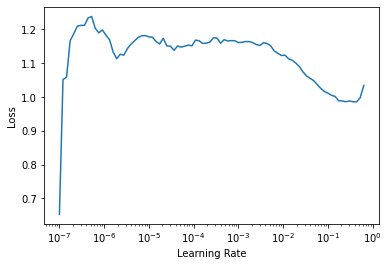

In [36]:
learn.lr_find(num_it=100)

In [37]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,_rmse,time
0,1.038381,0.836230,0.914456,00:05


In [38]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,_rmse,time
0,0.660244,0.521412,0.722088,00:08


In [39]:
learn.unfreeze()
learn.fit_one_cycle(50, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,_rmse,time
0,0.505980,0.551600,0.742698,00:10
1,0.497167,0.531422,0.728987,00:10
2,0.495644,0.536680,0.732584,00:10
3,0.481812,0.543769,0.737407,00:10
4,0.468439,0.499622,0.706839,00:10
5,0.452663,0.491559,0.701113,00:10
6,0.432660,0.468969,0.684813,00:10
7,0.415339,0.452624,0.672773,00:10
8,0.395878,0.456325,0.675518,00:10
9,0.376715,0.439550,0.662986,00:10


In [40]:
df_test.head(3)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,f0953f0a5,NaN,NaN,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."
2,0df072751,NaN,NaN,"It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband's two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet's bright face grew still brighter as she made room for him on the sofa by her side.\n""We were beginni..."


In [41]:
text = df_test.loc[0].excerpt
target = df_train.loc[0].target

In [42]:
text

'My hope lay in Jack\'s promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n"I am certain to go wrong," I said to myself.\n"It is out of my power to follow a direct course without something to serve as a compass. I will go back to the village and wait till morning."'

In [43]:
target

-0.340259125

In [44]:
learn.predict(text)

((-0.65234375), tensor([-0.6523]), tensor([-0.6523]))

In [45]:
text2 = df_test.loc[1].excerpt
target2 = df_train.loc[1].target

In [46]:
(text2,target2)

('Dotty continued to go to Mrs. Gray\'s every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played "King and Queen." Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The "nipperkins" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played "King and Queen." She knew the milk was not hers, but Mrs. Gray\'s; still she said to herself, "Ruthie needn\'t give so much measure, all pressed down and run over. If Queenie and I should drink a great deal more, there would always be a quart left. Yes, I know there would."\nMrs. Gray never said anything about the milk; she merely poured it out in a pan, and gave back the pail to Dotty, asking her at the same time as many questions as the child would stay to hear.',
 -0.31537234199999997)

In [47]:
learn.predict(text2)

((-0.07403564453125), tensor([-0.0740]), tensor([-0.0740]))

In [48]:
text3 = df_test.loc[2].excerpt
target3 = df_train.loc[2].target

In [49]:
(text3,target3)

('It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband\'s two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet\'s bright face grew still brighter as she made room for him on the sofa by her side.\n"We were beginning to wonder what was keeping you," she said.\n"Yes, I\'m afraid I am rather behind time," he returned. "I hope you have not delayed your tea for me, Mrs. Dinsmore."\n"No; it is but just ready," she said. "Ah, there\'s the bell. Please, all of you walk out."\nWhen the meal was over all returned to the parlor, where they spent the next hour in desultory chat.',
 -0.580117966)

In [50]:
learn.predict(text3)

((-0.146240234375), tensor([-0.1462]), tensor([-0.1462]))

In [51]:
learn.export("./final_model")